In [211]:
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as Im
import scipy.optimize as opt

%matplotlib inline

In [212]:
data = pd.read_excel("./data/data.xlsx") #Read the data

T_data = data["period (s)"]

theta = data["theta_2"] - data["theta_1 (deg)"]

theta_s_meas = np.radians(np.mean(theta.iloc[0:4]))
dtheta_s_meas = np.radians(theta.iloc[0:4].std(ddof=1))

theta_m_meas = np.radians(np.mean(theta.iloc[5:9]))
dtheta_m_meas = np.radians(theta.iloc[5:9].std(ddof=1))

theta_l_meas = np.radians(np.mean(theta.iloc[10:14]))
dtheta_l_meas = np.radians(theta.iloc[10:14].std(ddof=1))

data["theta"] = theta

g_meas = 9.81

T_meas = T_data.mean()
dT_meas = T_data.std(ddof=1)

M_p_meas = 246.5/1000
dM_p_meas = 0.1/1000

m_meas = 65.9 /1000
dm_meas = 0.1/1000

M_meas = M_p_meas + m_meas
dM_meas = np.sqrt(dM_p_meas**2 + dm_meas**2)

R_cm_meas = 29/100
dR_cm_meas = 1/100

R_b_meas = 29.5/100
dR_b_meas = 0.5/100

In [213]:
T = sp.Symbol('T')
dT = sp.Symbol('dT')
g = sp.Symbol('g')
M_p = sp.Symbol('M_p')
dM_p = sp.Symbol('dM_p')
m = sp.Symbol('m')
dm = sp.Symbol('dm')
M = sp.Symbol('M')
dM = sp.Symbol('dM')
R_cm = sp.Symbol('R_cm')
dR_cm = sp.Symbol('dR_cm')
R_b = sp.Symbol('R_b')
dR_b = sp.Symbol('dR_b')
I = sp.Symbol('I')
dI = sp.Symbol('dI')
v_s = sp.Symbol('v_s')
dv_s = sp.Symbol('dv_s')
v_m = sp.Symbol('v_m')
dv_m = sp.Symbol('dv_m')
v_l = sp.Symbol('v_l')
dv_l = sp.Symbol('dv_l')
theta_s = sp.Symbol('theta_s')
dtheta_s = sp.Symbol('dtheta_s')
theta_m = sp.Symbol('theta_m')
dtheta_m = sp.Symbol('dtheta_m')
theta_l = sp.Symbol('theta_l')
dtheta_l = sp.Symbol('dtheta_l')
mysublist=[(T,T_meas),(dT,dT_meas),(g,g_meas),(M_p,M_p_meas),(dM_p,dM_p_meas),(m,m_meas),
           (dm,dm_meas),(M,M_meas),(dM,dM_meas),(R_cm,R_cm_meas),(dR_cm,dR_cm_meas),(R_b,R_b_meas),
           (dR_b,dR_b_meas),(theta_s,theta_s_meas),(dtheta_s,dtheta_s_meas),(theta_m,theta_m_meas),
           (dtheta_m,dtheta_m_meas),(theta_l,theta_l_meas),(dtheta_l,dtheta_l_meas)]

I = R_cm*M*g*T**2/(4*np.pi**2)
I_meas = I.subs(mysublist)
mysublist.append((I,I_meas))

dI = ((sp.diff(I,T,1)*dT)**2 + (sp.diff(I,M,1)*dM)**2 + (sp.diff(I,R_cm,1)*dR_cm)**2)**(0.5)
dI_meas = dI.subs(mysublist)
mysublist.append((dI,dI_meas))

v_s = 1/(m*R_b)*(2*I*M*g*(1-sp.cos(theta_s)))**(0.5)
v_s_meas = v_s.subs(mysublist)
mysublist.append((v_s,v_s_meas))

dv_s = ((sp.diff(v_s,m,1)*dm)**2 + (sp.diff(v_s,R_b,1)*dR_b)**2 + (sp.diff(v_s,R_cm,1)*dR_cm)**2 +
        (sp.diff(v_s,T,1)*dT)**2 + (sp.diff(v_s,M,1)*dM)**2 + (sp.diff(v_s,theta_s,1)*dtheta_s)**2)**(0.5)
dv_s_meas = dv_s.subs(mysublist)
mysublist.append((dv_s,dv_s_meas))

v_m = 1/(m*R_b)*(2*I*M*g*(1-sp.cos(theta_m)))**(0.5)
v_m_meas = v_m.subs(mysublist)
mysublist.append((v_m,v_m_meas))

dv_m = ((sp.diff(v_m,m,1)*dm)**2 + (sp.diff(v_m,R_b,1)*dR_b)**2 + (sp.diff(v_m,R_cm,1)*dR_cm)**2 +
        (sp.diff(v_m,T,1)*dT)**2 + (sp.diff(v_m,M,1)*dM)**2 + (sp.diff(v_m,theta_m,1)*dtheta_m)**2)**(0.5)
dv_m_meas = dv_m.subs(mysublist)
mysublist.append((dv_m,dv_m_meas))

v_l = 1/(m*R_b)*(2*I*M*g*(1-sp.cos(theta_l)))**(0.5)
v_l_meas = v_l.subs(mysublist)
mysublist.append((v_l,v_l_meas))

dv_l = ((sp.diff(v_l,m,1)*dm)**2 + (sp.diff(v_l,R_b,1)*dR_b)**2 + (sp.diff(v_l,R_cm,1)*dR_cm)**2 +
        (sp.diff(v_l,T,1)*dT)**2 + (sp.diff(v_l,M,1)*dM)**2 + (sp.diff(v_l,theta_l,1)*dtheta_l)**2)**(0.5)
dv_l_meas = dv_l.subs(mysublist)
mysublist.append((dv_l,dv_l_meas))


In [214]:
data

,trial,period (s),x (mm),dx (mm),theta_1 (deg),theta_2,dtheta,theta
0,1,0.79,32.79,2.0,0.6,21.5,0.5,20.9
1,2,0.74,32.79,2.0,0.6,20.0,0.5,19.4
2,3,1.00,32.79,2.0,0.6,18.7,0.5,18.1
3,4,0.71,32.79,2.0,0.6,17.7,0.5,17.1
4,5,0.85,32.79,2.0,0.6,18.0,0.5,17.4
5,6,1.04,53.46,2.0,0.6,35.5,0.5,34.9
6,7,0.93,53.46,2.0,0.6,39.2,0.5,38.6
7,8,1.01,53.46,2.0,0.6,37.1,0.5,36.5
8,9,1.08,53.46,2.0,0.6,35.0,0.5,34.4
9,10,1.06,53.46,2.0,0.6,30.2,0.5,29.6


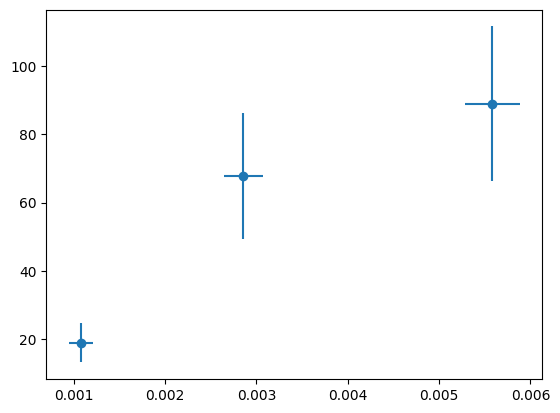

In [215]:
v_s_sq = v_s_meas**2
dv_s_sq = 2*v_s_meas*dv_s_meas

v_m_sq = v_m_meas**2
dv_m_sq = 2*v_m_meas*dv_m_meas

v_l_sq = v_l_meas**2
dv_l_sq = 2*v_l_meas*dv_l_meas

x_s = 32.79/1000
dx_s = 2/1000
x_s_sq = x_s**2
dx_s_sq = 2*x_s*dx_s

x_m = 53.46/1000
dx_m = 2/1000
x_m_sq = x_m**2
dx_m_sq = 2*x_m*dx_m

x_l = 74.71/1000
dx_l = 2/1000
x_l_sq = x_l**2
dx_l_sq = 2*x_l*dx_l

x_list = np.array([x_s_sq,x_m_sq,x_l_sq])
dx_list = np.array([dx_s_sq,dx_m_sq,dx_l_sq])
v_list = np.array([v_s_sq,v_m_sq,v_l_sq])
dv_list = np.array([dv_s_sq,dv_m_sq,dv_l_sq])

plot = plt.errorbar(x_list,v_list,xerr=dx_list,yerr=dv_list,fmt='o')
plt.show(plot)

In [216]:
def linreg(x,A,B): #Curve function
    y = A + B*x
    return y

p, cov = opt.curve_fit(linreg, #Perform the curve fit
                       x_list, 
                       v_list,
                       sigma=dx_list,
                       absolute_sigma = True)

fitA = p[0]
fitdA = np.sqrt(cov[0,0])

fitB = p[1]
fitdB = np.sqrt(cov[1,1])

print("Linear Fit Results for x-axis")
print("y-intercept: %1.4f +/- %1.4f m" % (fitA, fitdA))
print("slope: %1.2f +/- %1.2f m/s" % (fitB, fitdB)) # Linear regression for the observed vs predicted plot

Linear Fit Results for x-axis
y-intercept: 3.6892 +/- 0.0002 m
slope: 17301.40 +/- 0.07 m/s


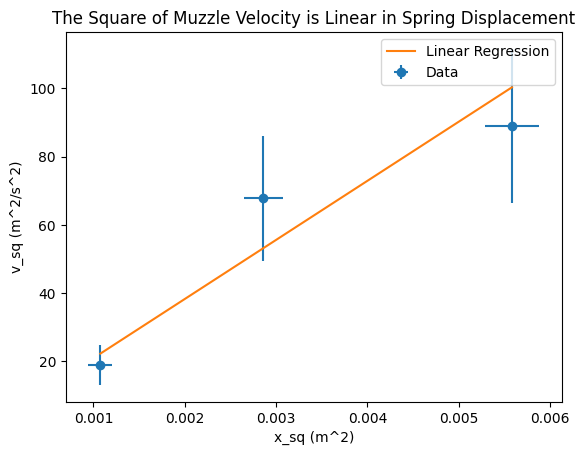

In [217]:
plot1 = plt.errorbar(x_list,v_list,xerr=dx_list,yerr=dv_list,fmt='o',label ="Data")
plot2 = plt.plot(x_list, 
        linreg(x_list,fitA,fitB), 
        label="Linear Regression")
plt.xlabel("x_sq (m^2)")
plt.ylabel("v_sq (m^2/s^2)")
plt.legend()
plt.title("The Square of Muzzle Velocity is Linear in Spring Displacement")
plt.show(plot1,plot2)

In [218]:
k = fitB*m_meas
dk = np.sqrt(fitdB**2 + dm_meas**2)
print("The spring constant is %1.2f +/- %1.2f N/m" % (k,dk))

The spring constant is 1140.16 +/- 0.07 N/m
